# Data Preprocessing

In [1]:
#install pydotplus
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

## 1) After bringing in the data, compute the percentage of missing for all variables

In [2]:
charlesbc_df = pd.read_excel('CharlesBookClub-Project1.xlsx')
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)
percent_missing(charlesbc_df)

FirstPurch          0.01975
DoItYBks            0.01425
F                   0.01350
YouthBks            0.01075
M                   0.00950
CookBks             0.00950
RefBks              0.00925
R                   0.00900
GeogBks             0.00850
ItalAtlas           0.00825
ArtBks              0.00825
ItalCook            0.00650
ChildBks            0.00425
ItalArt             0.00075
ID#                 0.00000
Gender              0.00000
No_Florence         0.00000
Yes_Florence        0.00000
Florence            0.00000
Related Purchase    0.00000
Mcode               0.00000
Rcode               0.00000
Fcode               0.00000
Seq#                0.00000
dtype: float64

In [3]:
#Checking the median for all columns. All values are whole numbers except for sequence, therfor no need to round.
median_df = pd.DataFrame({'median': charlesbc_df.median()})
print(median_df)

                   median
Seq#               2000.5
ID#               16581.0
Gender                1.0
M                   208.0
R                    12.0
F                     2.0
FirstPurch           20.0
ChildBks              0.0
YouthBks              0.0
CookBks               0.0
DoItYBks              0.0
RefBks                0.0
ArtBks                0.0
GeogBks               0.0
ItalCook              0.0
ItalAtlas             0.0
ItalArt               0.0
Florence              0.0
Related Purchase      0.0
Mcode                 5.0
Rcode                 3.0
Fcode                 2.0
Yes_Florence          0.0
No_Florence           1.0


## 2) For any missing data, impute its value using the median (rounded to nearest whole number)

In [4]:
charlesbcfill_df = charlesbc_df.fillna(charlesbc_df.median())
percent_missing(charlesbcfill_df)

No_Florence         0.0
Yes_Florence        0.0
ID#                 0.0
Gender              0.0
M                   0.0
R                   0.0
F                   0.0
FirstPurch          0.0
ChildBks            0.0
YouthBks            0.0
CookBks             0.0
DoItYBks            0.0
RefBks              0.0
ArtBks              0.0
GeogBks             0.0
ItalCook            0.0
ItalAtlas           0.0
ItalArt             0.0
Florence            0.0
Related Purchase    0.0
Mcode               0.0
Rcode               0.0
Fcode               0.0
Seq#                0.0
dtype: float64

## 3) Compute the summary statistics (mean, sd, min, max and median) for the following variables: M,R,F

In [5]:
mrf_df = charlesbcfill_df[['M', 'R', 'F']].copy()
mrf_df.head()
stats_df = pd.DataFrame({'min': mrf_df.min(), 'mean': mrf_df.mean(), 'median': mrf_df.median(), \
                      'sd': mrf_df.std(), 'max': mrf_df.max()})

#stats_df.head()
print(stats_df)

    min       mean  median          sd    max
M  15.0  208.12825   208.0  100.519664  479.0
R   2.0   13.37450    12.0    8.067963   36.0
F   1.0    3.80550     2.0    3.438841   12.0


## A) Comments in report.

## 4) Create dummy variables for the following variables: Mcode, Rcode and Fcode

In [6]:
mrfcode_df = charlesbcfill_df[['Mcode', 'Rcode', 'Fcode']].copy()
mrfcode_df.head()
mrfdummies_df = pd.get_dummies(mrfcode_df,columns=['Mcode','Rcode', 'Fcode'])
mrfdummies_df.head()

,Mcode_1,Mcode_2,Mcode_3,Mcode_4,Mcode_5,Rcode_1,Rcode_2,Rcode_3,Rcode_4,Fcode_1,Fcode_2,Fcode_3
0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,1,0,0


## A) Combine the dummy variables back to the original data

In [7]:
charlesbcfill_df.drop(['Mcode', 'Rcode', 'Fcode'], axis = 1)
new_df = pd.concat([charlesbcfill_df, mrfdummies_df], axis=1)
new_df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,Mcode_3,Mcode_4,Mcode_5,Rcode_1,Rcode_2,Rcode_3,Rcode_4,Fcode_1,Fcode_2,Fcode_3
0,1,25,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,2,29,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
2,3,46,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,...,0,1,0,0,0,0,1,0,0,1
3,4,47,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
4,5,51,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0


## B) Print the number of rows and columns before and after combining the dummy variables

In [8]:
# Check to see if the merge worked
print("Number of rows BEFORE merging:", charlesbcfill_df.shape[0])
print("Number of columns BEFORE merging:", charlesbcfill_df.shape[1])

print("\nNumber of rows AFTER merging:", new_df.shape[0])
print("Number of columns AFTER merging:", new_df.shape[1])

Number of rows BEFORE merging: 4000
Number of columns BEFORE merging: 24

Number of rows AFTER merging: 4000
Number of columns AFTER merging: 36


# Data Visualization

## 1) Provide a bar graph of the following variables:

## A) Gender. Comment on what you see. What is the percentage of men and women who responded to the test mailing? Did women respond more? Did men respond more?

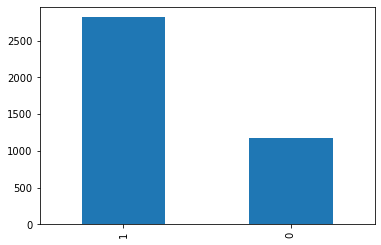

In [9]:
new_df['Gender'].value_counts()
new_df['Gender'].value_counts().plot(kind='bar')

In [10]:
new_df['Gender'].value_counts(normalize=True) * 100

1    70.45
0    29.55
Name: Gender, dtype: float64

## B) Florence. What percentage of the book was bought? What percentage was not?

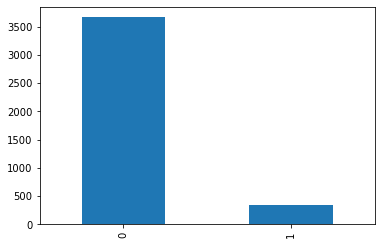

In [11]:
new_df['Florence'].value_counts()
new_df['Florence'].value_counts().plot(kind='bar')

In [12]:
new_df['Florence'].value_counts(normalize=True) * 100

0    91.55
1     8.45
Name: Florence, dtype: float64

## 2) Comparing a numeric variable across a categorical variable

## A) Group the data by the variable “Florence”. For this group compute the average of the following variables: M,R,F. Provide a bar chart for each of the scenario

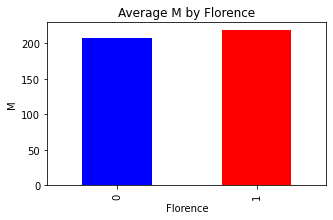

In [13]:
florence_avg = new_df.groupby('Florence').mean() #Average of ALL variables by Florence
m_avg = florence_avg.M #Average M by Florence
r_avg = florence_avg.R #Average R by Florence
f_avg = florence_avg.F #Average F by Florence

# Get bar chart of average M by Florence
m_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average M by Florence")
plt.xlabel("Florence")
plt.ylabel("M")
plt.show()

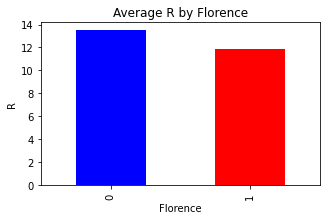

In [14]:
# Get bar chart of average R by Florence
r_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average R by Florence")
plt.xlabel("Florence")
plt.ylabel("R")
plt.show()

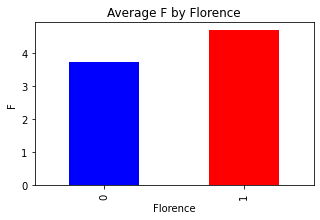

In [15]:
# Get bar chart of average F by Florence
f_avg.plot(kind='bar', figsize=[5, 3], color=['b','r'])
plt.title("Average F by Florence")
plt.xlabel("Florence")
plt.ylabel("F")
plt.show()

## B) Comments on all three scenarios are in the report.

## 3) Comparing numeric variables

## A) Provide a scatter plot matrix between the following variables: FirstPurch, ChildBks, YouthBks, CookBks, DoItYBks, RefBks, ArtBks, GeoBks, ItalCook, ItalAtlas, ItalArt and Related Purchase

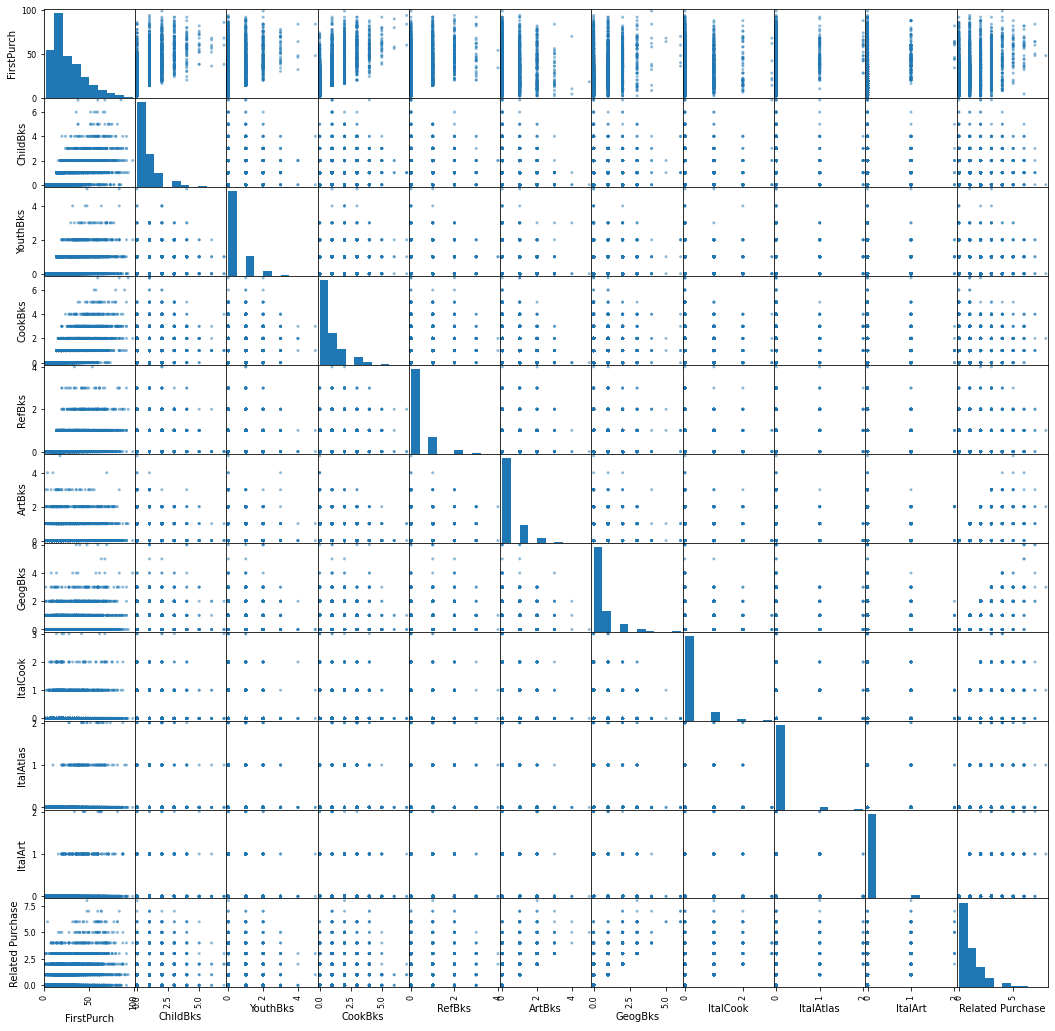

In [16]:
#Create a new dataframe consisting of variables FirstPurch, ChildBks, YouthBks, CookBks, DoltYBks, RefBks, ArtBks,
#GeoBks, ItalCook, ItalAtlas, ItalArt, and Related Purchase
new_scatter_df = new_df[['FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook',
                        'ItalAtlas', 'ItalArt', 'Related Purchase']]

pd.plotting.scatter_matrix(new_scatter_df, figsize=(18, 18), diagonal='hist')
plt.show()

## B) Pick any three variables and comment on their scatter plot. Comments are in the report. Below is another scatterplot matrix containing only the variables chosen. Simply for easier viewing.

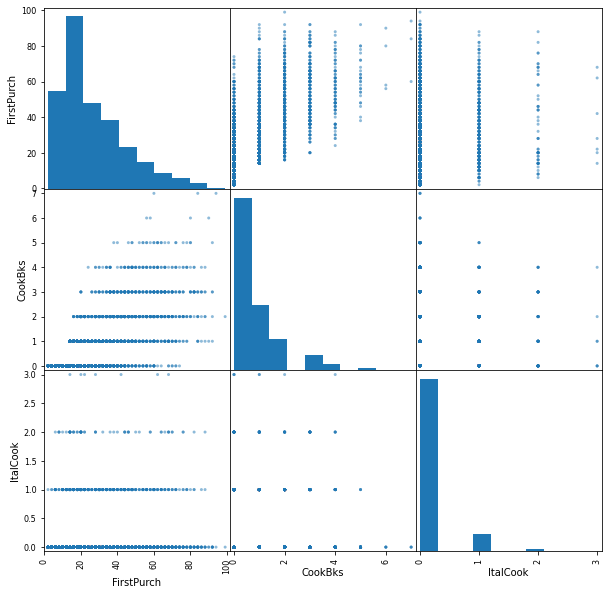

In [17]:
chosen_scatter_df = new_df[['FirstPurch', 'CookBks', 'ItalCook']]

pd.plotting.scatter_matrix(chosen_scatter_df, figsize=(10, 10), diagonal='hist')
plt.show()

## 4) Provide a heatmap of all the variables in question 3a. Include their correlation values in the plot.

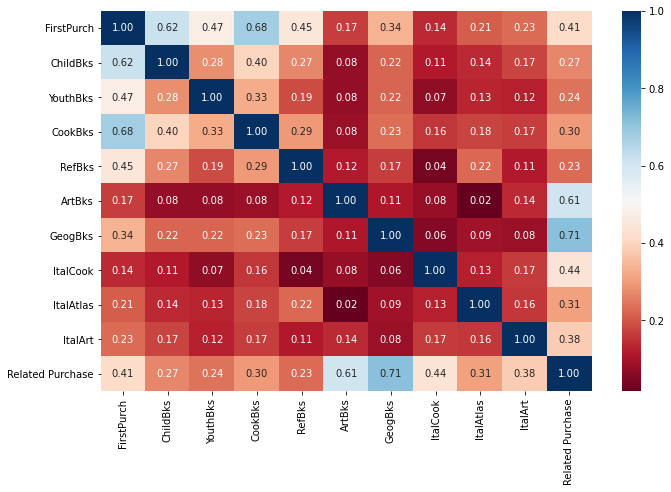

In [18]:
#Get correlation between variables in 3A
corr = new_scatter_df.corr()

plt.figure(figsize=(11, 7)) #Set size of heatmap
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")
plt.show()

## A) For the variables in question 3b, does the correlation value in the heatmap confirm your suspicion? Why or why not? Answer is in the report.

## 5) Provide a side-by-side boxplot of the variables M,R,F by the variable Florence

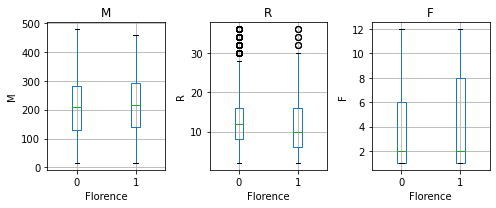

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

# regular scale
ax = new_df.boxplot(column='M', by='Florence', ax=axes[0])
ax.set_xlabel('Florence')
ax.set_ylabel('M')

ax = new_df.boxplot(column='R', by='Florence', ax=axes[1])
ax.set_xlabel('Florence')
ax.set_ylabel('R')

ax = new_df.boxplot(column='F', by='Florence', ax=axes[2])
ax.set_xlabel('Florence')
ax.set_ylabel('F')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

## A) Comments are in the report.

# Part 2

## Modeling

## Removing Unwanted Columns

In [20]:
# Delete the Seq#, ID#, and No_Flornce columns
new_df2 = new_df.drop(columns=['Seq#', 'ID#', 'No_Florence','Florence'])
new_df2.head()

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,...,Mcode_3,Mcode_4,Mcode_5,Rcode_1,Rcode_2,Rcode_3,Rcode_4,Fcode_1,Fcode_2,Fcode_3
0,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
2,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1
3,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
4,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0


## Check to see if deletion worked.

In [21]:
# Check to see if the merge worked
print("Number of rows BEFORE merging:", new_df.shape[0])
print("Number of columns BEFORE merging:", new_df.shape[1])

print("\nNumber of rows AFTER merging:", new_df2.shape[0])
print("Number of columns AFTER merging:", new_df2.shape[1])

Number of rows BEFORE merging: 4000
Number of columns BEFORE merging: 36

Number of rows AFTER merging: 4000
Number of columns AFTER merging: 32


## Split data and set dependent variable.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify dependent and independent variables
y = new_df2['Yes_Florence']
X = new_df2.drop(columns=['Yes_Florence'])

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X_train = StandardScaler().fit_transform(train_X)
std_X_test = StandardScaler().fit_transform(test_X)

std_train_df = pd.DataFrame(std_X_train, columns=train_X.columns)
std_test_df = pd.DataFrame(std_X_test, columns=test_X.columns)

std_X_df.head()

NameError: name 'std_X_df' is not defined

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree

# Parameters for grid search
parameters = {
    'max_depth': list(range(2, 11)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(train_X, train_y)

# Best decision tree from the grid search
best_tree = grid_search.best_estimator_

# PLot the best tree
#plotDecisionTree(best_tree, feature_names=train_X.columns)

# Decision Tree (Best) class label for training and testing data
dt_pred_train = best_tree.predict(train_X)
dt_pred_test = best_tree.predict(test_X)

## Logistic Regression, kNN, and LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# fit kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(std_train_df, train_y)

# fit discriminant analysis model
da = LinearDiscriminantAnalysis()
da.fit(train_X, train_y)

# fit a logistic regression
log = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
log.fit(train_X, train_y)

In [ ]:
# kNN class label for training and testing data
knn_pred_train = knn.predict(std_train_df)
knn_pred_test = knn.predict(std_test_df)

# discriminant analysis class label for training and testing data
da_pred_train = da.predict(train_X)
da_pred_test = da.predict(test_X)

# discriminant analysis class label for training and testing data
log_pred_train = log.predict(train_X)
log_pred_test = log.predict(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Class": train_y, "kNN_Prediction": knn_pred_train,\
                             "DA_Prediction":da_pred_train,\
                             "Logistic_Prediction":log_pred_train})

print("Class predictions for training data")
pred_summary.head(10)

## Neural Networks

### Check for the effects of overfitting: Check difference between training and testing metric - accuracy

In [ ]:
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# Scaling the data for MLP classifier. Values will be between 0 and 1
scaler = MinMaxScaler()
scaled_data_train = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
scaled_data_test = pd.DataFrame(scaler.fit_transform(test_X), columns=test_X.columns)

# fit MLP (MultiLayer Perceptron) model Did ONE hidden layer was 3
mlp = MLPClassifier(hidden_layer_sizes=1, activation='logistic', solver='lbfgs', random_state=1, max_iter=300)
mlp.fit(scaled_data_train, train_y)

print("***Confusion matrix and accuracy for training data")
classificationSummary(train_y, mlp.predict(scaled_data_train))

print("\n\n***Confusion matrix and accuracy for testing data")
classificationSummary(test_y, mlp.predict(scaled_data_test))

# Check cross-validation
acc_scores = cross_val_score(mlp, train_X, train_y, cv=10, scoring="accuracy")
print("\n\n***MLP accuracy using 10-fold cv:", round(acc_scores.mean(), 4))

In [ ]:
# MLP class label for training and testing data
mlp_pred_train = mlp.predict(scaled_data_train)
mlp_pred_test = mlp.predict(scaled_data_test)

# Check for the effects of overfitting: Check maximum number of iterations - max iter


In [ ]:
# Not sure this step is needed per the instructions of your email
train_mis_rate = []
test_mis_rate = []

num = 301
for i in range(1, num):    
    mlp_cv = MLPClassifier(hidden_layer_sizes=1, activation='logistic', solver='lbfgs', random_state=1, max_iter=i)

    #Accuracy rate for testing and training data using 5-fold cross validation
    #train_acc = cross_val_score(mlp_cv, scaled_data_train, train_y, cv=5, scoring="accuracy").mean()
    #test_acc = cross_val_score(mlp_cv, scaled_data_test, test_y, cv=5, scoring="accuracy").mean()

    #train_mis_rate.append(1 - train_acc) #Misclassification rate for training data
    #test_mis_rate.append(1 - test_acc)   #Misclassification rate for testing data

# Plot misclassification rate for training and testing data
#plt.plot(np.arange(1, num), train_mis_rate, label="Training Data")
#plt.plot(np.arange(1, num), test_mis_rate, label="Testing Data")
#plt.title("Overfitting")
#plt.xlabel("Iterations")
#plt.ylabel("Misclassification Rates")
#plt.legend(loc="upper right")
#plt.show()

# Model Evaluation

## 10-Fold Cross Validation (I changed train to test data, still 100%)

## Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Ten-fold cross-validation of the kNN classifier
scores = cross_val_score(best_tree, test_X, test_y, cv=10)

# Print average accuracy score
avg_acc = scores.mean()
avg_mis = (1 - avg_acc)

print("Average accuracy score:", round(avg_acc, 3))
print("Average misclassification score:", round(avg_mis, 3))

# The average misclassification score implies the model is wrong 8.3% of the time. 

## kNN

In [ ]:
# Before cross validation
classificationSummary(test_y, knn_pred_test)

# Ten-fold cross-validation of the kNN classifier
scores = cross_val_score(knn, std_test_df, test_y, cv=10)

# Print average accuracy score
avg_acc = scores.mean()
avg_mis = (1 - avg_acc)
print("Average accuracy score:", round(avg_acc, 3))
print("Average misclassification score:", round(avg_mis, 3))

# The average misclassification score implies the model is wrong 8.5% of the time. 

## Discriminant Analysis

In [ ]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(train_X, train_y)

# Get the intercept and coefficients of the linear discriminant analysis
da_intercept = da_reg.intercept_[0]
da_coeff = da_reg.coef_[0]

# Print intercept and model coefficients
print('Linear discriminant analysis intercept: ', da_intercept)
print("Linear discriminant analysis variables and their coefficients:")
pd.DataFrame({'coeff': da_coeff}, index=train_X.columns) #DataFrame of variables and coeff

# Get the class predictions of the model, along with its probabilities 
da_train_pred = da_reg.predict(train_X)
da_train_pred = da_reg.predict_proba(train_X)


In [ ]:
# Before cross validation
classificationSummary(test_y, da_pred_test)

# Ten-fold cross-validation of the DA classifier
scores = cross_val_score(da, test_X, test_y, cv=10)

# Print average accuracy score
avg_acc = scores.mean()
avg_mis = (1 - avg_acc)
print("Average accuracy score:", round(avg_acc, 3))
print("Average misclassification score:", round(avg_mis, 3))

# The average misclassification score implies the model is wrong 8.1% of the time. 

## Logistic Regression

In [ ]:
# Before cross validation
classificationSummary(test_y, log_pred_test)

# Ten-fold cross-validation of the Logistic Regression classifier
scores = cross_val_score(log, test_X, test_y, cv=10)

# Print average accuracy score
avg_acc = scores.mean()
avg_mis = (1 - avg_acc)
print("Average accuracy score:", round(avg_acc, 3))
print("Average misclassification score:", round(avg_mis, 3))

# The average misclassification score implies the model is wrong 7.8% of the time. 

# Neural Networks

In [ ]:
# Before cross validation
classificationSummary(test_y, mlp_pred_test)

# Ten-fold cross-validation of the kNN classifier
scores = cross_val_score(mlp, std_test_df, test_y, cv=10)

# Print average accuracy score
avg_acc = scores.mean()
avg_mis = (1 - avg_acc)
print("Average accuracy score:", round(avg_acc, 3))
print("Average misclassification score:", round(avg_mis, 3))

# The average misclassification score implies the model is wrong 7.8% of the time. 

## Which model is best?

### Both neural networks and logistic models have the same accuracy score of 0.922. 
### The data is heavility skewed for negitive results therefore the true postiives for each model are very small relative to data set.

## ROC Curves

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
mlp_auc_test = roc_auc_score(test_y, mlp_pred_test)
dt_auc_test = roc_auc_score(test_y, dt_pred_test)
knn_auc_test = roc_auc_score(test_y, knn_pred_test)
da_auc_test = roc_auc_score(test_y, da_pred_test)
log_auc_test = roc_auc_score(test_y, log_pred_test)

# calculate fpr and tpr for logistic regression and linear discriminant analysis
mlp_fpr_test, mlp_tpr_test, _ = roc_curve(test_y, mlp_pred_test)
dt_fpr_test, dt_tpr_test, _ = roc_curve(test_y, dt_pred_test)
knn_fpr_test, knn_tpr_test, _ = roc_curve(test_y, knn_pred_test)
da_fpr_test, da_tpr_test, _ = roc_curve(test_y, da_pred_test)
log_fpr_test, log_tpr_test, _ = roc_curve(test_y, log_pred_test)

# Plotting
plt.plot(mlp_fpr_test, mlp_tpr_test, linestyle='--', label="{}{:.3f}".format("MLP AUC=", mlp_auc_test))
plt.plot(dt_fpr_test, dt_tpr_test, linestyle='--', label="{}{:.3f}".format("DT AUC=", dt_auc_test))
plt.plot(knn_fpr_test, knn_tpr_test, linestyle='--', label="{}{:.3f}".format("kNN AUC=", knn_auc_test))
plt.plot(da_fpr_test, da_tpr_test, linestyle='--', label="{}{:.3f}".format("LDA AUC=", da_auc_test))
plt.plot(log_fpr_test, log_tpr_test, linestyle='--', label="{}{:.3f}".format("Log. Reg AUC=", log_auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("LDA vs. Logistic Regression vs KNN vs DT vs MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# The data set isn't a good data set. Based on the ROC curves MLP is the best model and the KNN at 0.497 is the worst. All the models are not any better than simply guessing. 

## Lift Charts

In [ ]:
from dmba import gainsChart, liftChart

knn_pred_class = knn_pred_test
test_pred_prob = knn.predict_proba(test_X)

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": knn_pred_test,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()

### Our models aren't giving us a good prediction. The lift charts and cumilitative gains models do not perform signifigantly better than using no model at all. 

In [23]:
from dmba import gainsChart, liftChart

log_pred_class = log_pred_test
test_pred_prob = log.predict_proba(test_X)

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": log_pred_test,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()

### Our models aren't giving us a good prediction. The lift charts and cumilitative gains models do not perform signifigantly better than using no model at all. 

NameError: name 'log_pred_test' is not defined

In [24]:
from dmba import gainsChart, liftChart

da_pred_class = da_pred_test
test_pred_prob = da.predict_proba(test_X)

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": da_pred_test,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()

### Our models aren't giving us a good prediction. The lift charts and cumilitative gains models do not perform signifigantly better than using no model at all. 

NameError: name 'da_pred_test' is not defined

from dmba import gainsChart, liftChart

dt_pred_class = dt_pred_test
test_pred_prob = best_tree.predict_proba(test_X)

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": dt_pred_test,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()

### Our models aren't giving us a good prediction. The lift charts and cumilitative gains models do not perform signifigantly better than using no model at all. 

In [25]:
from dmba import gainsChart, liftChart

mlp_pred_class = mlp_pred_test
test_pred_prob = mlp.predict_proba(test_X)

pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": dt_pred_test,\
                             "P(Y=0)":test_pred_prob[:,0], "P(Y=1)":test_pred_prob[:,1]})

# Create the Gains table
gains_table = pred_summary.sort_values(by='P(Y=1)', ascending=False)

# Plot Gains and Decile chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
gainsChart(gains_table.Actual_Class, ax=axes[0])
liftChart(gains_table.Actual_Class, ax=axes[1])
plt.show()

### Our models aren't giving us a good prediction. The lift charts and cumilitative gains models do not perform signifigantly better than using no model at all. 

NameError: name 'mlp_pred_test' is not defined

# Part 3


## Classification Modeling



    ## Identify dependent and independent variables
    ## Partition the data such that 80% is used for training and 20% is used for testing



In [29]:
from sklearn.model_selection import train_test_split

florence_1 = new_df2[new_df2.Yes_Florence == 1]

Y = florence_1['M'] 
X = florence_1.drop(columns=['M', 'Mcode', 'Mcode_1', 'Mcode_2', 'Mcode_3', 'Mcode_4', 'Mcode_5','Fcode','Rcode','Rcode_1',
                            'Rcode_2','Rcode_3','Rcode_4','Fcode_1','Fcode_2','Fcode_3', 'Related Purchase'])


# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=1)
train_X.head()

,Gender,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Yes_Florence
3757,1,6.0,11.0,66.0,1.0,0.0,1.0,4.0,0.0,1.0,2.0,0.0,2.0,0.0,1
962,1,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
852,1,8.0,11.0,32.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1
3299,0,16.0,1.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3611,1,12.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1


## Exhaustive Search Approach

In [30]:
from sklearn.linear_model import LinearRegression
from dmba import adjusted_r2_score

# Function to do a linear regression (DO NOT CHANGE. LEAVE AS IS)
def train_model(variables): #(DO NOT CHANGE. LEAVE AS IS)
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Function to assess the quality of the model using ajusted R-squared (DO NOT CHANGE. LEAVE AS IS)
def score_model(model, variables): #(DO NOT CHANGE. LEAVE AS IS)
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [32]:
from dmba import AIC_score
from dmba import exhaustive_search

# Names of all variables in the training data 
variable_names = train_X.columns
variable_names
# Result of the exhaustive search
# results = exhaustive_search(variable_names, train_model, score_model) 

# Making the results presentable to see (DO NOT CHANGE. LEAVE AS IS)
#data = []
#for result in results:
   # model = result['model']
   # variables = result['variables']
   # AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
   # d = {'Predictors': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
   # d.update({var: var in result['variables'] for var in variable_names})
   # data.append(d)
    
# Select variables from dataframe
#selection = pd.DataFrame(data, columns=('Predictors', 'r2adj', 'AIC') + tuple(sorted(variable_names)))


Index(['Gender', 'R', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 'CookBks',
       'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas',
       'ItalArt', 'Yes_Florence'],
      dtype='object')

In [35]:
from dmba import AIC_score
from dmba import exhaustive_search

## Forward Selection-Using all variables in training predict M

In [36]:
from dmba import forward_selection
from dmba import regressionSummary

# Names of all variables in the training data
variable_names = train_X.columns

# Call the forward selection function
fs_best_model, fs_best_variables = forward_selection(variable_names, train_model, score_model, verbose=False)

# Best variables using forward selection
print(fs_best_variables)

# How good is the model?
fs_prediction = fs_best_model.predict(test_X[fs_best_variables])
regressionSummary(test_y, fs_prediction)

['F', 'GeogBks']

Regression statistics

                      Mean Error (ME) : 2.5916
       Root Mean Squared Error (RMSE) : 84.5685
            Mean Absolute Error (MAE) : 71.4721
          Mean Percentage Error (MPE) : -30.0850
Mean Absolute Percentage Error (MAPE) : 55.8969


## Stepwise Regression- Using all variables in training predict M

In [48]:
from dmba import stepwise_selection

# Names of all variables in the training data
variable_names = train_X.columns

# Call the stepwise regression function
sr_best_model, sr_best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=False)

# Best variables using stepwise regression
print(sr_best_variables)

# How good is the model?
sr_prediction = sr_best_model.predict(test_X[sr_best_variables])
regressionSummary(test_y, sr_prediction)

['F', 'GeogBks']

Regression statistics

                      Mean Error (ME) : 2.5916
       Root Mean Squared Error (RMSE) : 84.5685
            Mean Absolute Error (MAE) : 71.4721
          Mean Percentage Error (MPE) : -30.0850
Mean Absolute Percentage Error (MAPE) : 55.8969


## Decision Trees- Using all variables in training predict M

In [37]:
from sklearn.tree import DecisionTreeRegressor

# user grid search to find optimized tree
dt_grid = {
    'max_depth': [5, 10, 15], 
    'min_impurity_decrease': [0, 0.001], 
    'min_samples_split': [10, 15, 20], 
}

dt_gs = GridSearchCV(DecisionTreeRegressor(random_state=28), dt_grid, cv=10, n_jobs=-1)
dt_gs.fit(train_X, train_y)

# Best decision tree from the grid search
best_dt = dt_gs.best_estimator_

# Print best parameters of decision trees
print('Best parameters: ', dt_gs.best_params_)

NameError: name 'GridSearchCV' is not defined

### Decision Trees- Get First 5 Most Important Variables and Plot Them

In [38]:
# Get important variables
dt_importances = best_dt.feature_importances_

# Important features
imp_dt_features = pd.DataFrame({'feature': train_X.columns, 'dt_importance': dt_importances})
imp_dt_features_sort = imp_dt_features.sort_values(by="dt_importance", ascending=False)

# Plotting variable importance
imp_dt_features_sort.head(5).plot(kind='barh', x='feature', legend=False)
plt.title("Decision Tree Variable Importance")
plt.tight_layout()
plt.show()

NameError: name 'best_dt' is not defined

In [39]:
# Fit another boosted model on the 5 most important variables
dt_vars_5 = imp_dt_features_sort.feature.values[:5] #Top 5 important variables of random forest
dt_train_X = train_X[dt_vars_5] #Independent variables

dt_model_5 = DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0, min_samples_split=20)
dt_model_5.fit(dt_train_X, train_y)

NameError: name 'imp_dt_features_sort' is not defined

## Regression Tree Model Prediction and Evaluation out

In [68]:
from dmba import regressionSummary

rt_pred_train = dt_model_5.predict(train_X[dt_vars_5])
rt_pred_test = dt_model_5.predict(test_X[dt_vars_5])

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Prediction": train_y,
                             "RT_Prediction":rt_pred_train})

print("Predictions for training data")
pred_summary.head(10)

# Model evaluation
print("****** TRAINING DATA ********")
regressionSummary(train_y, rt_pred_train)

print("\n****** TESTING DATA ********")
regressionSummary(test_y, rt_pred_test)

Predictions for training data
****** TRAINING DATA ********

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 68.7019
            Mean Absolute Error (MAE) : 56.0833
          Mean Percentage Error (MPE) : -25.8288
Mean Absolute Percentage Error (MAPE) : 45.9696

****** TESTING DATA ********

Regression statistics

                      Mean Error (ME) : -3.6899
       Root Mean Squared Error (RMSE) : 99.3425
            Mean Absolute Error (MAE) : 83.3802
          Mean Percentage Error (MPE) : -34.2816
Mean Absolute Percentage Error (MAPE) : 63.5837


## Random Forest- Using all variables in training predict M

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# user grid search to find optimized random forest parameters
rf_grid = {
    'max_depth': [5, 10, 15], 
    'min_impurity_decrease': [0, 0.001], 
    'min_samples_split': [10, 15, 20], 
}

rf_gs = GridSearchCV(RandomForestRegressor(random_state=15), rf_grid, cv=10, n_jobs=-1)
rf_gs.fit(train_X, train_y)

# Best random forest from the grid search
best_rf = rf_gs.best_estimator_

# Print best parameters of random forest
print('Best parameters: ', rf_gs.best_params_)

Best parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


## Random Forest - Except the multiple linear regression what is the top 5 most important and plot

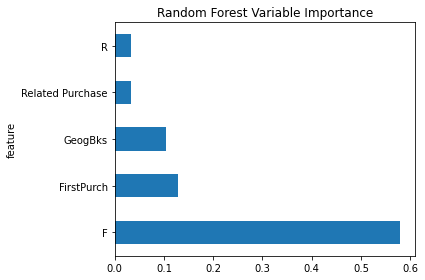

In [55]:
# Get important variables
rf_importances = best_rf.feature_importances_

# Important features
imp_rf_features = pd.DataFrame({'feature': train_X.columns, 'rf_importance': rf_importances})
imp_rf_features_sort = imp_rf_features.sort_values(by="rf_importance", ascending=False)

# Plotting variable importance
imp_rf_features_sort.head(5).plot(kind='barh', x='feature', legend=False)
plt.title("Random Forest Variable Importance")
plt.tight_layout()
plt.show()

In [56]:
# Fit another random forest model on the 5 most important variables
rf_vars_5 = imp_rf_features_sort.feature.values[:5] #Top 5 important variables of random forest
rf_train_X = train_X[rf_vars_5] #Independent variables

rf_model_5 = RandomForestRegressor(max_depth=15, min_impurity_decrease=0, min_samples_split=10)
rf_model_5.fit(rf_train_X, train_y)

RandomForestRegressor(max_depth=15, min_impurity_decrease=0,
                      min_samples_split=10)

## Boosted Trees- Using all variables in training predict M

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# user grid search to find optimized random forest parameters
boost_grid = {
    'max_depth': [5, 10, 15], 
    'min_impurity_decrease': [0, 0.001,0.005], 
    'min_samples_split': [10, 20, 30], 
}

boost_gs = GridSearchCV(GradientBoostingRegressor(random_state=15), boost_grid, cv=10, n_jobs=-1)
boost_gs.fit(train_X, train_y)

# Best boost from the grid search
best_boost = boost_gs.best_estimator_

# Print best parameters of boosting
print('Best parameters: ', boost_gs.best_params_)

Best parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 30}


## Boosted Trees- Except the multiple linear regression what is the top 5 most important and plot

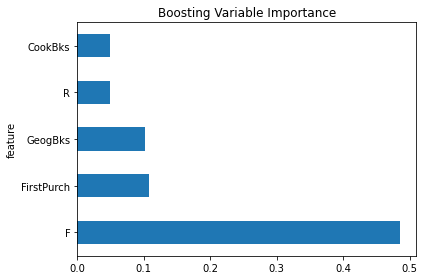

In [58]:
# Get important variables
boost_importances = best_boost.feature_importances_

# Important features
imp_boost_features = pd.DataFrame({'feature': train_X.columns, 'boost_importance': boost_importances})
imp_boost_features_sort = imp_boost_features.sort_values(by="boost_importance", ascending=False)

# Plotting variable importance
imp_boost_features_sort.head(5).plot(kind='barh', x='feature', legend=False)
plt.title("Boosting Variable Importance")
plt.tight_layout()
plt.show()

In [59]:
# Fit another boosted model on the 5 most important variables
boost_vars_5 = imp_boost_features_sort.feature.values[:5] #Top 5 important variables of random forest
boost_train_X = train_X[boost_vars_5] #Independent variables

boost_model_5 = GradientBoostingRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=15)
boost_model_5.fit(boost_train_X, train_y)

GradientBoostingRegressor(max_depth=5, min_impurity_decrease=0,
                          min_samples_split=15)

# DO THESE MODELS OVERLAP? 

In [69]:
train_X.shape

(270, 25)

## Using the top 5 variables on the testing data. predict M using ALL models above
## Not Needed

In [60]:
# Select columns in testing data corresponding to top 5 important variables
rf_test_X = test_X[rf_vars_5]
boost_test_X = test_X[boost_vars_5]
dt_test_X = test_X[dt_vars_5]
be_test_X = test_X[be_vars_5]
fs_test_X = test_X[fs_vars_5]
sr_test_X = test_X[sr_vars_5]

# Model Prediction on top 5 important features
rf_pred_test = rf_model_5.predict(rf_test_X)
boost_pred_test = boost_model_5.predict(boost_test_X)
dt_pred_test = dt_model_5.predict(dt_test_X)
be_pred_test = be_model_5.predict(be_test_X)
fs_pred_test = fs_model_5.predict(fs_test_X)
sr_pred_test = sr_model_5.predict(sr_test_X)

## What is the model evaluation for ALL the models?

In [61]:
from dmba import regressionSummary

# Random forest
print("**************************Random Forest**************************")
regressionSummary(test_y, rf_pred_test)

# Random forest
print("\n**************************Boosted Trees**************************")
regressionSummary(test_y, boost_pred_test)

# Decision Trees
print("\n**************************Decision Trees**************************")
regressionSummary(test_y, dt_pred_test)

# Backward Elimination
print("\n**************************Backward Elimination**************************")
regressionSummary(test_y, be_pred_test)

# Backward Elimination
print("\n**************************Forward Selection**************************")
regressionSummary(test_y, fs_pred_test)

# Backward Elimination
print("\n**************************Stepwise Regression**************************")
regressionSummary(test_y, sr_pred_test)

**************************Random Forest**************************

Regression statistics

                      Mean Error (ME) : -0.4739
       Root Mean Squared Error (RMSE) : 87.5574
            Mean Absolute Error (MAE) : 74.2003
          Mean Percentage Error (MPE) : -30.9249
Mean Absolute Percentage Error (MAPE) : 57.5691

**************************Boosted Trees**************************

Regression statistics

                      Mean Error (ME) : -0.6708
       Root Mean Squared Error (RMSE) : 94.1434
            Mean Absolute Error (MAE) : 78.5417
          Mean Percentage Error (MPE) : -29.8861
Mean Absolute Percentage Error (MAPE) : 58.3779

**************************Decision Trees**************************

Regression statistics

                      Mean Error (ME) : -3.6899
       Root Mean Squared Error (RMSE) : 99.3425
            Mean Absolute Error (MAE) : 83.3802
          Mean Percentage Error (MPE) : -34.2816
Mean Absolute Percentage Error (MAPE) : 63.5837

***